# Vorbereitung

Wechseln zwischen Datenbanken

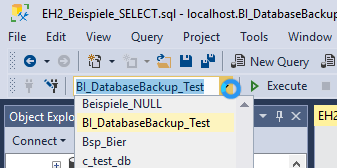

In [ ]:
-- Datenbank wechseln:
USE AdventureWorks2017

# Aufbau eines Select Statements

![This image has an empty alt attribute; its file name is image-10.png](https://erhard-rainer.com/wp-content/uploads/2021/11/image-10.png)

## Full Qualified Table Name (FQTN)

- \[Server (bei Verwendung von Linked Servern) – wird in der Literatur nicht immer mitgezählt\]
- Database
- Schema
- Table

zB: (\[LinkedServer\].)(\[DB\].)\[SCHEMA\].\[Tabellenname\]

\[AdventureWorks2017\].\[HumanResources\].\[Department\]

(\[DB\].)\[SCHEMA\].\[Tabellenname\]

  

  

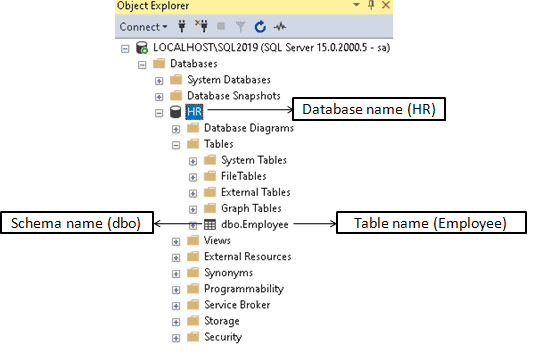

In [ ]:
SELECT * FROM [AdventureWorks2017].[dbo].[ErrorLog];

SELECT * FROM [dbo].[ErrorLog];

SELECT * FROM [ErrorLog]; -- => dbo Default Schema


Das Default-Schema wird auf Eben des Users konfiguriert:

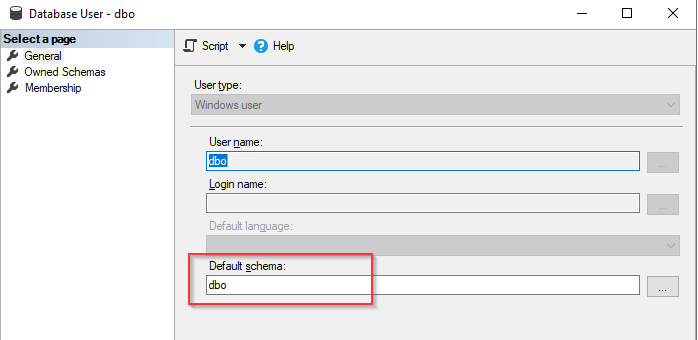  

Wenn keines definiert wird, wird dbo angenommen.

In [ ]:
-- überprüfen des Default Schemas
SELECT SCHEMA_NAME();

Wenn sich eine Tabelle nicht im Default Schema befindet, darf man das Schema nicht weglassen

In [ ]:
SELECT * FROM [AdventureWorks2017].[HumanResources].[Department];

Select * from [HumanResources].[Department]

Select * from [Department] -- => erwartet [dbo].[Department]

Wenn keine reservierten Wörter (zB order) oder Leerzeichen und andere Regelverletzungen vorkommen (https://erhard-rainer.com/sql-naming-rules/), dann kann man auch auf \[\] verzichten,

In [ ]:
SELECT * FROM AdventureWorks2017.HumanResources.Department;

Select * from HumanResources.Department

oder stattdessen " verwenden

In [ ]:
SELECT * FROM "AdventureWorks2017"."HumanResources"."Department";

Select * from "HumanResources"."Department"

## Abfrage einzelner Spalten

Es ist nicht empfehlenswerte alle Spalten (\*) abzufragen.

In [ ]:
-- alle Spalten // nicht empfehlenswert
SELECT *
FROM [Sales].[SalesOrderHeader];

-- Ausgabe einer bestimmten Spalte:
SELECT SalesOrderID,
       OrderDate
FROM [Sales].[SalesOrderHeader];

Verwendung eines Alias für eine Spalte

In [ ]:
SELECT SalesOrderID AS [ID],
       OrderDate AS [Date]
FROM [Sales].[SalesOrderHeader];

Alternative Methoden eine Spalte anzusprechen

- nur Spaltennamen
- Spaltennamen mit Alias der Tabelle
- Spaltennamen mit FQTN der Tabelle

In [ ]:
-- nur die Spalten: SaleOrderID, SalesOrderNumber, PurchaseOrderNumber
SELECT SalesOrderID, SalesOrderNumber, PurchaseOrderNumber FROM [Sales].[SalesOrderHeader]
-- auch möglich
SELECT s.SalesOrderID, s.SalesOrderNumber, s.PurchaseOrderNumber FROM [Sales].[SalesOrderHeader] AS s -- insb. bei JOINS notwendig
SELECT [Sales].[SalesOrderHeader].SalesOrderID, [Sales].[SalesOrderHeader].SalesOrderNumber, [Sales].[SalesOrderHeader].PurchaseOrderNumber FROM [Sales].[SalesOrderHeader]

**<u>Alias von Tabellen</u>**

In [ ]:
--- Beispiel: Alias für Tabellen
SELECT s.SalesOrderID,
       s.OrderDate
FROM [Sales].[SalesOrderHeader] AS s;

--- Beispiel: Alias für Tabellen
SELECT SalesOrderID,
       OrderDate
FROM [Sales].[SalesOrderHeader] AS s;

Weiters ist es belanglos (außer bei der Verletzung von Regeln), wie die Spaltennamen geschrieben werden:

- ohne (nicht bei Regelverstößen \[Leerzeichen\] oder geschützten Wörtern)
- mit \[\]
- mit "

In [ ]:
SELECT SalesOrderID, SalesOrderNumber, PurchaseOrderNumber FROM [Sales].[SalesOrderHeader]
SELECT [SalesOrderID], [SalesOrderNumber], [PurchaseOrderNumber] FROM [Sales].[SalesOrderHeader]
SELECT "SalesOrderID", "SalesOrderNumber", "PurchaseOrderNumber" FROM [Sales].[SalesOrderHeader]
SELECT "SalesOrderID", [SalesOrderNumber], PurchaseOrderNumber FROM [Sales].[SalesOrderHeader]

## Ordnen der Ausgabe (ORDER BY)

In [ ]:
-- SalesORderID, AccountNumber sortiert nach AccountNumber aufsteigend
SELECT SalesOrderID,
       AccountNumber
FROM [Sales].[SalesOrderHeader]
ORDER BY AccountNumber ASC;

In [ ]:
-- SalesORderID, AccountNumber sortiert nach AccountNumber aufsteigend, Sortiert nach ORderDate absteigend
-- Zeige alle AccountNumbers mit den SalesOrders sortiert nach AccountNumber (aufsteigend) und Bestelldatum (OrderDate) (absteigend)
SELECT SalesOrderID,
       AccountNumber,
       OrderDate
FROM [Sales].[SalesOrderHeader]
ORDER BY AccountNumber ASC,
         OrderDate DESC;

Im Gegensatz zu den anderen SQL Bestandteilen, muss hier nicht der initiale Spaltennamen verwendet werden, sondern der Alias oder die Spaltennummer

In [ ]:
-- SalesORderID, AccountNumber sortiert nach AccountNumber aufsteigend
SELECT SalesOrderID,
       AccountNumber
FROM [Sales].[SalesOrderHeader]
ORDER BY 2 ASC;

In [ ]:
-- SalesORderID, AccountNumber sortiert nach AccountNumber aufsteigend
SELECT SalesOrderID,
       AccountNumber as [AccNr]
FROM [Sales].[SalesOrderHeader]
ORDER BY AccountNumber ASC;

In [ ]:
-- SalesORderID, AccountNumber sortiert nach AccountNumber aufsteigend
SELECT SalesOrderID,
       AccountNumber as [AccNr]
FROM [Sales].[SalesOrderHeader]
ORDER BY AccNr ASC;

## Limitieren der Ausgabe (TOP X)

- ohne Order By - wie in der DB gespeichert
- mit Order By - Reihenfolge der Ausgabe veränderbar

In [ ]:
-- nur die ersten 10 Zeilen
SELECT TOP 10
       *
FROM [Sales].[SalesOrderHeader];

In [ ]:
-- die 10 neuesten Zeilen nach OrderDate
SELECT TOP 10
       *
FROM [Sales].[SalesOrderHeader]
ORDER BY OrderDate; -- automatisch [ASC]

In [ ]:
-- die 10 Bestellungen, die zuletzt bestellt wurden
-- Anmerkung: berücksichtigt nicht, dass mehrere Bestellungen zur selben Zeit erfolgen konnten => dazu später
SELECT TOP 10
       *
FROM [Sales].[SalesOrderHeader]
ORDER BY OrderDate DESC; -- [DESC/ASC]

In [ ]:
SELECT TOP 1000 * FROM [Sales].[SalesOrderHeader] ORDER BY OrderDate DESC, SalesOrderNumber ASC ; -- [DESC/ASC]

## Gruppieren der Ergebnisse (GROUP BY)

.. dient der Aggregation von Werten

Sofern keine Aggregationsfunktionen verwendet werden, kann man stattdessen auch DISTINCT verwenden

  

<u>Beispiel: Gruppieren ohne Aggregationsfunktionen</u>

In [ ]:
-- Ausgangssituation
SELECT [AccountNumber] FROM  [Sales].[SalesOrderHeader] 
---GROUP BY [AccountNumber]
ORDER BY 1 asc --aufsteigende sortiert

In [ ]:
SELECT [AccountNumber] FROM  [Sales].[SalesOrderHeader] 
GROUP BY [AccountNumber]
ORDER BY 1 asc --aufsteigende sortiert

In [ ]:
SELECT DISTINCT [AccountNumber] FROM  [Sales].[SalesOrderHeader] 
ORDER BY 1 asc --aufsteigende sortiert

In [19]:
SELECT [AccountNumber] ,
Count(1) as [Anzahl]
FROM  [Sales].[SalesOrderHeader] 
GROUP BY [AccountNumber]
ORDER BY 1 asc --aufsteigende sortiert

(19119 rows affected)

Displaying Top 5000 rows.

Total execution time: 00:00:00.165

AccountNumber,Anzahl
10-4020-000001,4
10-4020-000002,8
10-4020-000003,12
10-4020-000004,8
10-4020-000005,8
10-4020-000006,4
10-4020-000007,4
10-4020-000008,4
10-4020-000009,7
10-4020-000010,8


In [ ]:
-- Aggregationsfuktionen sind nicht mit Distinct kombinierbar => Fehler
SELECT Distinct [AccountNumber] ,
Count(1) as [Anzahl]
FROM  [Sales].[SalesOrderHeader] 
ORDER BY 1 asc --aufsteigende sortiert

In [ ]:
--  Liste aller verfügbaren Stati 
SELECT DISTINCT  [Status]
FROM [Sales].[SalesOrderHeader];

SELECT  [Status]
FROM [Sales].[SalesOrderHeader]
Group by [Status]

<u>**Group by & Alias**</u>

Bei Group By kann man <mark>**nicht** den Alias der Spalte verwenden</mark>, sondern muss den initialen Namen verwenden.  
Somit geht folgende Query nicht:

In [ ]:
SELECT  [Status] as [OrderStatus]
FROM [Sales].[SalesOrderHeader]
Group by [OrderStatus]

In [ ]:
--richtig:
SELECT  [Status] as [OrderStatus]
FROM [Sales].[SalesOrderHeader]
Group by [Status]

<u>Beispiel: Gruppieren mit Aggregationsfunktionen</u>

In [ ]:
-- Zeige mir alle Kunden und in welchem Zeitraum Sie wie oft bestellt haben, sortiert nach der Anzahl der Bestellungen absteigend
SELECT [AccountNumber], MIN(OrderDate) AS [Start], MAX(OrderDate) AS [End], COUNT(1) AS [Anzahl]
FROM  [Sales].[SalesOrderHeader]
GROUP BY [AccountNumber]
ORDER BY 4 desc

In [ ]:
-- gib zusätzlich die Spalte [CustomerID]
SELECT [AccountNumber], [CustomerID],  MIN(OrderDate) AS [Start], MAX(OrderDate) AS [End], COUNT(1) AS [Anzahl]
FROM  [Sales].[SalesOrderHeader]
GROUP BY [AccountNumber], [CustomerID]
ORDER BY [Anzahl] desc

In [28]:
-- schlägt fehl:
-- gib zusätzlich die Spalte [CustomerID]
SELECT [AccountNumber], [CustomerID],  MIN(OrderDate) AS [Start], MAX(OrderDate) AS [End], COUNT(1) AS [Anzahl]
FROM  [Sales].[SalesOrderHeader]
GROUP BY [AccountNumber]
ORDER BY [Anzahl] desc

: Msg 8120, Level 16, State 1, Line 3
Column 'Sales.SalesOrderHeader.CustomerID' is invalid in the select list because it is not contained in either an aggregate function or the GROUP BY clause.

Total execution time: 00:00:00.003

## HAVING

Will man auf das Ergebnis einer Aggregationsfunktion filtern, kann man 

(a) HAVING verwenden

(b) eine SubQuery verwenden (siehe dazu noch später)

In [ ]:
-- Zeige mir alle Kunden mit mehr als 10 Bestellungen und in welchem Zeitraum Sie wie oft bestellt haben, sortiert nach der Anzahl der Bestellungen absteigend
SELECT [AccountNumber], MIN(OrderDate) AS [Start], MAX(OrderDate) AS [End], COUNT(1) AS [Anzahl]
FROM  [Sales].[SalesOrderHeader]
GROUP BY [AccountNumber]
HAVING COUNT(1) > 10
ORDER BY 4 desc


In [ ]:
-- Zeige mir alle Kunden mit mehr als 10 Bestellungen und in welchem Zeitraum Sie wie oft bestellt haben, sortiert nach der Anzahl der Bestellungen absteigend
Select * from (
SELECT [AccountNumber], MIN(OrderDate) AS [Start], MAX(OrderDate) AS [End], COUNT(1) AS [Anzahl]
FROM  [Sales].[SalesOrderHeader]
GROUP BY [AccountNumber]) as q
Where [Anzahl] > 10 
ORDER BY 4 desc